In [2]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [63]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/b42/Nov-13-2024-23-37-23_0.7143957513699482_LTE_Na_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] >0])


/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [64]:
remove = [22770.0	,22740.0,23308.0			]
output_trimmed = output_trimmed[~output_trimmed["wave_center"].isin(remove)]

In [65]:
# output_trimmed = output_trimmed[output_trimmed["flag_warning"]!=1010000]

In [66]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,Na_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,B42_clean.txt,23348.5,23347.0,23350.0,1.9197,0.0,0.7653,6.0,0.0,0.0,8.484498,797.4085,0,0
1,B42_clean.txt,23379.0,23377.0,23381.0,-1.6830,0.0,0.2870,6.0,0.0,0.0,0.712065,790.1457,0,0


In [67]:
X = "Na"
np.mean(output_trimmed[f"{X}_Fe"]).round(2)

np.float64(0.53)

In [70]:
(solar_abundances[X] + 0.2870	)

6.577

In [ ]:
(solar_abundances[X] + np.mean(output_trimmed[f"{X}_Fe"])).round(2)

In [14]:
np.mean(output_trimmed[f"Fe_H"]).round(2)

np.float64(-0.31)

In [16]:
(solar_abundances["Fe"] + np.mean(output_trimmed[f"Fe_H"])).round(2)

np.float64(7.19)

In [71]:
# plot_one_star(config_dict, "B42_clean")

In [2]:
multwavs = [22587.95,22593.85,22613.8,22634,22659.4,22680.5,22691.75,22703,22713.25,22773.25,22783.3,22789.35,22915.25,23028.35,23067.25,23655.35,
            22920.00, 23292.60]


In [3]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/b42/Nov-11-2024-13-29-55_0.7786918172011659_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed_vmic = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed_vmic = output_trimmed_vmic.reset_index(drop=True)
output_trimmed_vmic = output_trimmed_vmic[~output_trimmed_vmic["wave_center"].isin(multwavs)]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


5.0 0.004293129623058763 14
6.0 0.00433856905439897 15
7.0 0.003568189482968728 15
8.0 0.004272264478402368 18


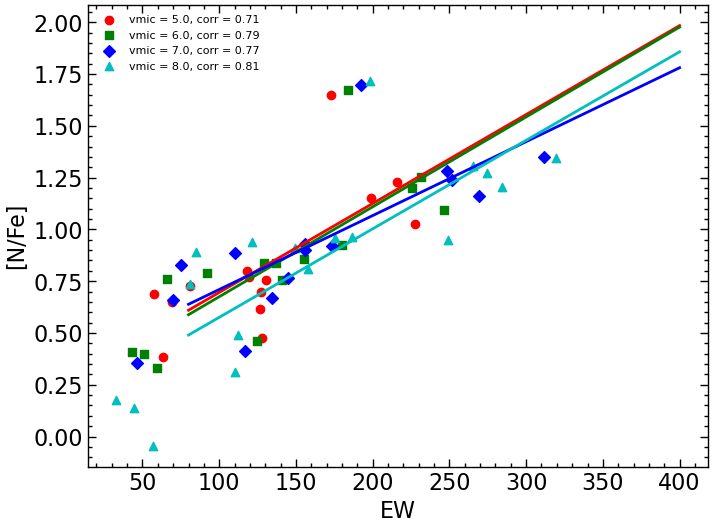

In [5]:
vmics = np.unique(output_trimmed_vmic["Microturb"].values)
cs = ['r', 'g', 'b', 'c', 'm', 'y']
markers = ['o', 's', 'D', '^', 'v', 'p']
for i in range(len(vmics)):
    vmic = vmics[i]
    output_vmic = output_trimmed_vmic[output_trimmed_vmic["Microturb"] == vmic]
    ews = np.array(output_vmic["ew"])
    nfes = np.array(output_vmic["N_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    choose_idxs = np.where(np.logical_and(np.abs(nfes - mean_nfe) < 3*std_nfe, nfes>-0.5))
    choose_idxs = choose_idxs[0]

    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    plt.scatter(ews,nfes, c=cs[i], marker = markers[i], label = f"vmic = {vmics[i]}, corr = {corr}")
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(80, 400, 100)
    y = m*x + c
    print(vmics[i], m, len(nfes))
    plt.plot(x,y, c = cs[i])
    plt.legend(fontsize = 8)
    plt.ylabel("[N/Fe]")
    plt.xlabel("EW")

In [11]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/b42/Nov-11-2024-15-36-38_0.07947762042312756_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed_vmic = (output_results_pd_df[output_results_pd_df["chi_squared"] < 30])
output_trimmed_vmic = output_trimmed_vmic.reset_index(drop=True)
output_trimmed_vmic = output_trimmed_vmic[~output_trimmed_vmic["wave_center"].isin(multwavs)]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [12]:
output_trimmed_vmic

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,O_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,B42_clean.txt,22978.00,22976.0,22980.0,0.9223,0.0,-2.5000,5.0,0.0,0.0,9.987083,199.4746,10000,11010000
1,B42_clean.txt,23362.10,23360.7,23363.5,1.9833,0.0,-2.5000,5.0,0.0,0.0,28.091089,274.3469,0,10001000
2,B42_clean.txt,23373.00,23371.5,23374.5,-2.5000,0.0,-0.5267,5.0,0.0,0.0,25.007041,215.3265,10000,10010000
3,B42_clean.txt,23437.95,23436.7,23439.2,-2.0415,0.0,-2.5000,5.0,0.0,0.0,7.922167,26.7045,10000,11011000
4,B42_clean.txt,23759.00,23757.5,23760.5,-0.3495,0.0,-2.5000,5.0,0.0,0.0,17.216761,20.3059,10000,11010000
5,B42_clean.txt,24283.60,24282.6,24284.6,-2.5000,0.0,-0.5203,5.0,0.0,0.0,7.384498,176.3979,0,10010000
6,B42_clean.txt,24420.95,24419.4,24422.5,-0.0516,0.0,-0.3491,5.0,0.0,0.0,22.986686,440.4578,10000,1010000
7,B42_clean.txt,24683.35,24682.0,24684.7,-1.3227,0.0,-2.1359,5.0,0.0,0.0,19.886573,77.7125,10000,1010000
8,B42_clean.txt,22978.00,22976.0,22980.0,0.8312,0.0,-0.8709,6.0,0.0,0.0,9.114983,255.0235,0,1010000
9,B42_clean.txt,23362.10,23360.7,23363.5,1.9840,0.0,-2.5000,6.0,0.0,0.0,25.135366,287.9420,0,10000000


5.0 0.000696655482682366 3
6.0 -0.007019420647160586 3
7.0 0.0037881901977686767 4
8.0 0.00170594906723242 4


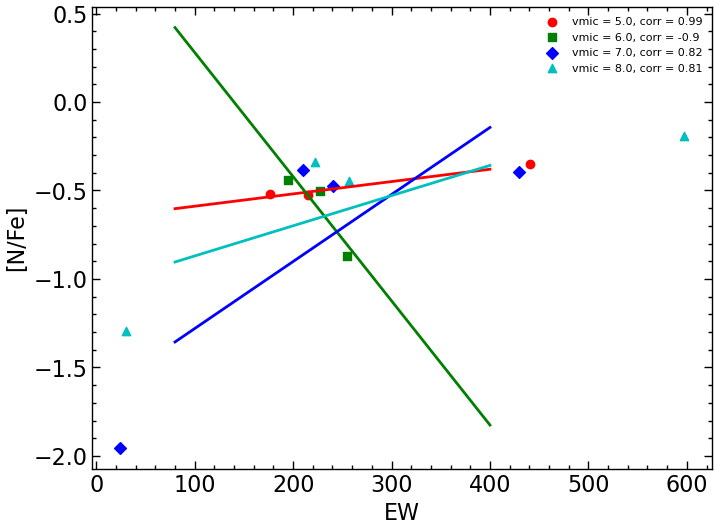

In [17]:
vmics = np.unique(output_trimmed_vmic["Microturb"].values)
cs = ['r', 'g', 'b', 'c', 'm', 'y']
markers = ['o', 's', 'D', '^', 'v', 'p']
for i in range(len(vmics)):
    vmic = vmics[i]
    output_vmic = output_trimmed_vmic[output_trimmed_vmic["Microturb"] == vmic]
    ews = np.array(output_vmic["ew"])
    nfes = np.array(output_vmic["O_Fe"])
    mean_nfe = np.mean(nfes)
    std_nfe = np.std(nfes)
    choose_idxs = np.where(np.logical_and(np.abs(nfes - mean_nfe) < 3*std_nfe, nfes>-2.))
    choose_idxs = choose_idxs[0]

    ews = ews[choose_idxs]
    nfes = nfes[choose_idxs]
    corr = np.corrcoef(ews,nfes)[0,1]
    corr = corr.round(2)
    plt.scatter(ews,nfes, c=cs[i], marker = markers[i], label = f"vmic = {vmics[i]}, corr = {corr}")
    m,c = np.polyfit(ews,nfes,1)
    x = np.linspace(80, 400, 100)
    y = m*x + c
    print(vmics[i], m, len(nfes))
    plt.plot(x,y, c = cs[i])
    plt.legend(fontsize = 8)
    plt.ylabel("[N/Fe]")
    plt.xlabel("EW")

In [15]:
(solar_abundances['C'] + np.mean(output_trimmed["C_Fe"])).round(3)

NameError: name 'output_trimmed' is not defined

In [22]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-24-2024-13-07-04_0.05164950234595578_LTE_N_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed_vmic = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed_vmic = output_trimmed_vmic.reset_index(drop=True)
output_trimmed_vmic = output_trimmed_vmic[~output_trimmed_vmic["wave_center"].isin(multwavs)]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [18]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/b42/"
# find the newest folder in the directory
import glob
newest_folder = max(glob.glob(outpath + "/*"), key=os.path.getctime)
config_dict = load_output_data(newest_folder)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed = output_trimmed[output_trimmed['C_Fe']+solar_abundances['C']>9.9]
# output_trimmed = output_trimmed[output_trimmed['C_Fe']+solar_abundances['C']<10.1]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [19]:
output_trimmed

,specname,wave_center,wave_start,wave_end,Doppler_Shift_add_to_RV,Fe_H,C_Fe,Microturb,Macroturb,rotation,chi_squared,ew,flag_error,flag_warning
0,B42_clean.txt,22647.50,22646.0,22649.0,-2.5000,0.0,1.5573,6.0,0.0,0.0,1.090308,134.4016,0,10000000
2,B42_clean.txt,22722.50,22721.0,22724.0,-1.9869,0.0,1.6124,6.0,0.0,0.0,0.768938,179.7204,0,0
3,B42_clean.txt,22736.50,22735.0,22738.0,-2.5000,0.0,1.5560,6.0,0.0,0.0,2.873834,416.7989,0,10000000
4,B42_clean.txt,22788.50,22787.0,22790.0,0.3902,0.0,1.4477,6.0,0.0,0.0,0.846125,415.2426,0,0
5,B42_clean.txt,22799.00,22797.0,22801.0,-0.4865,0.0,1.5963,6.0,0.0,0.0,2.157282,492.0849,0,10000
6,B42_clean.txt,22842.00,22840.0,22844.0,-0.8053,0.0,1.5405,6.0,0.0,0.0,2.804705,291.4549,0,1000000
7,B42_clean.txt,22862.50,22861.0,22864.0,2.3670,0.0,1.5738,6.0,0.0,0.0,2.304704,378.4879,0,0
8,B42_clean.txt,22869.70,22868.0,22871.4,0.4551,0.0,1.8441,6.0,0.0,0.0,0.635529,675.2579,0,0
9,B42_clean.txt,23055.50,23054.0,23057.0,-2.3573,0.0,1.6518,6.0,0.0,0.0,1.172489,464.1828,0,0
10,B42_clean.txt,23126.50,23125.5,23127.5,1.2548,0.0,1.5221,6.0,0.0,0.0,1.488214,175.3770,0,0


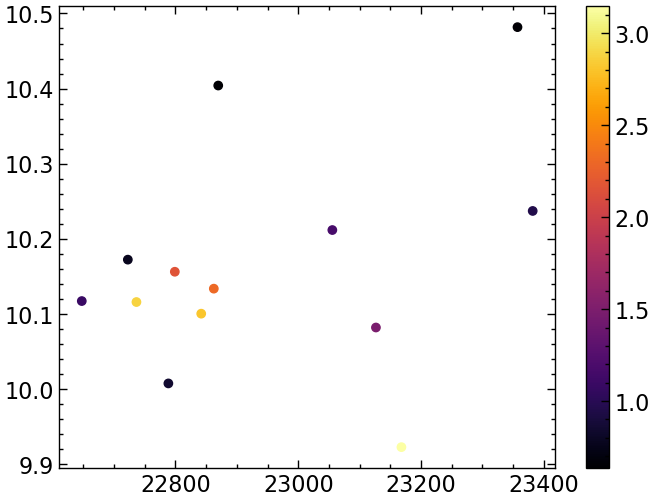

In [20]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['C_Fe']+solar_abundances['C'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [21]:
(solar_abundances['C'] + np.mean(output_trimmed["C_Fe"])).round(3)

np.float64(10.165)

In [22]:
np.std((output_trimmed["C_Fe"]))

np.float64(0.142802331623681)

In [126]:
solar_abundances['N'] + np.mean(output_trimmed["N_Fe"])

np.float64(9.271057142857144)

In [26]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/b42/"
# find the newest folder in the directory
import glob
newest_folder = max(glob.glob(outpath + "/*"), key=os.path.getctime)
config_dict = load_output_data(newest_folder)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed = output_trimmed[output_trimmed['N_Fe'] > 8.8-7.98]
# output_trimmed = output_trimmed[output_trimmed['N_Fe'] < 9.6-7.98]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


In [27]:
np.mean(output_trimmed["chi_squared"])

np.float64(1.697649578535128)

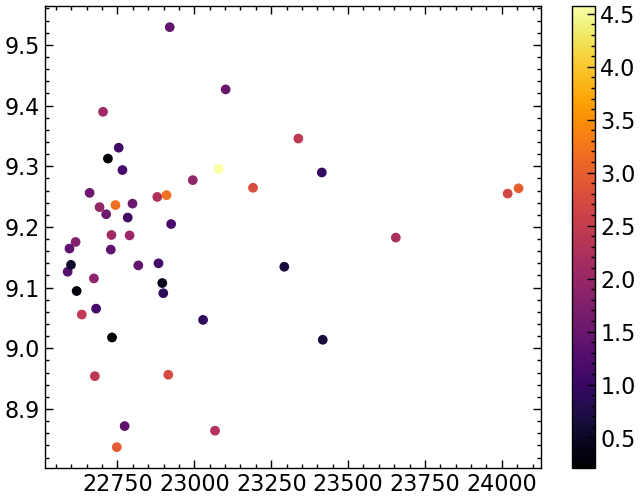

In [28]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['N_Fe']+7.98, c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [29]:
(7.98+np.mean(output_trimmed['N_Fe'])).round(3), np.std(output_trimmed['N_Fe']).round(3)

(np.float64(9.175), np.float64(0.141))

In [103]:
# plot_one_star(config_dict, 'B42_clean')

In [47]:
fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/b42/vmac', sep='  ')
fitlist

/tmp/ipykernel_62037/3060022836.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/b42/vmac', sep='  ')


,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(N),A(O),A(Fe),A(Mg),A(Na),A(Ca),A(S),A(Si),oisorat
0,B42_clean.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,10.165,9.175,8.84,7.19,7.89,6.58,6.43,7.06,7.62,0.26


In [48]:
rats = np.arange(0.1, 0.5,0.01)
rats = np.repeat(rats, 1)
rats

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49])

In [49]:
len(rats)

40

In [74]:
rats = np.linspace(np.log(0.1), np.log(0.5), 30)
rats = np.exp(rats)
rats = np.round(np.repeat(rats, 1),4)
rats

array([0.1   , 0.1057, 0.1117, 0.1181, 0.1249, 0.132 , 0.1395, 0.1475,
       0.1559, 0.1648, 0.1742, 0.1841, 0.1946, 0.2057, 0.2175, 0.2299,
       0.243 , 0.2569, 0.2715, 0.287 , 0.3034, 0.3207, 0.339 , 0.3584,
       0.3788, 0.4005, 0.4233, 0.4475, 0.473 , 0.5   ])

In [75]:
len(rats)

30

In [76]:
# Extract the last row
last_row = fitlist.iloc[-1]

# Create a new DataFrame by repeating the last row n times
new_rows = pd.DataFrame([last_row] * (len(rats) - len(fitlist)), columns=fitlist.columns)

# Append the new rows to the original DataFrame
fitlist2 = pd.concat([fitlist, new_rows], ignore_index=True)

fitlist2['oisorat'] = np.round(rats,3)
fitlist2

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(N),A(O),A(Fe),A(Mg),A(Na),A(Ca),A(S),A(Si),oisorat
0,B42_clean.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,10.165,9.175,8.84,7.19,7.89,6.58,6.43,7.06,7.62,0.100
1,B42_clean.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,10.165,9.175,8.84,7.19,7.89,6.58,6.43,7.06,7.62,0.106
2,B42_clean.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,10.165,9.175,8.84,7.19,7.89,6.58,6.43,7.06,7.62,0.112
3,B42_clean.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,10.165,9.175,8.84,7.19,7.89,6.58,6.43,7.06,7.62,0.118
4,B42_clean.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,10.165,9.175,8.84,7.19,7.89,6.58,6.43,7.06,7.62,0.125
5,B42_clean.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,10.165,9.175,8.84,7.19,7.89,6.58,6.43,7.06,7.62,0.132
6,B42_clean.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,10.165,9.175,8.84,7.19,7.89,6.58,6.43,7.06,7.62,0.140
7,B42_clean.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,10.165,9.175,8.84,7.19,7.89,6.58,6.43,7.06,7.62,0.148
8,B42_clean.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,10.165,9.175,8.84,7.19,7.89,6.58,6.43,7.06,7.62,0.156
9,B42_clean.txt,0.0,5500.0,1.0,0.0,6.0,7.5,11.5,10.165,9.175,8.84,7.19,7.89,6.58,6.43,7.06,7.62,0.165


In [77]:
fitlist2.to_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/b42/fitlist_comb', sep=' ', index=False)

In [86]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/b42/Nov-24-2024-13-28-12_0.3503094414981429_LTE_O_1D/output'
# allpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/hd137613/Oct-17-2024-23-13-22_0.35833114159931434_LTE_O_1D/output"
df1 = pd.read_csv(allpath, sep='\t')
# allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-10-19-06_0.7760709184924286_LTE_O_1D/output'
# df2 = pd.read_csv(allpath, sep='\t')


In [87]:
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
df_fine = df_fine[df_fine['oisorat'] > 0.1]

rats = np.unique(df_fine['oisorat'])

In [88]:
np.max(df_fine['Doppler_Shift_add_to_RV'])

np.float64(1.7770875710895326)

In [89]:
rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
rvs = []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    # sort by chi squared and take the first 2
    subdf.sort_values(by='red_chi_squared', inplace=True)
    # subdf = subdf.iloc[:2]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    rv = np.mean(subdf['Doppler_Shift_add_to_RV'])
    rvs.append(rv)
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

/tmp/ipykernel_62037/245589135.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf.sort_values(by='red_chi_squared', inplace=True)


In [90]:
subdf

,specname,O_Fe,Doppler_Shift_add_to_RV,chi_squared,vmac,red_chi_squared,oisorat
78,B42_clean.txt,0.036,1.628036,46.245349,0.0,5.746243,0.7
77,B42_clean.txt,0.036,1.642717,46.252007,0.0,5.746847,0.7
76,B42_clean.txt,0.036,1.647899,46.254638,0.0,5.747103,0.7
79,B42_clean.txt,0.036,1.567913,46.272585,0.0,5.753995,0.7


0.31 -0.14 -0.14


Text(0.5, 0, '16O/18O ratio')

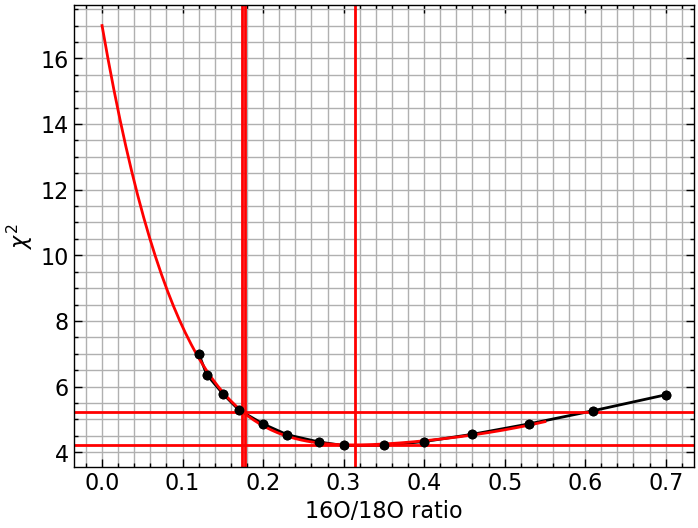

In [91]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 5)
x = np.linspace(0,0.55,150)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds


0.32 -0.15 0.28


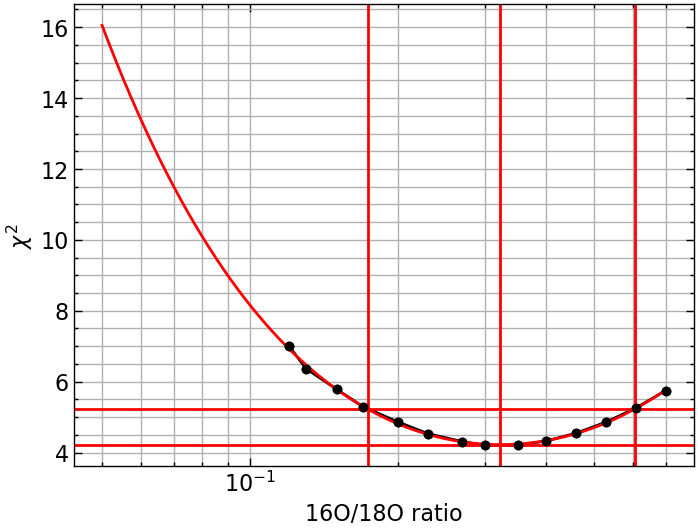

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with actual data)
# rats = np.array([20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180])
# chis = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 2, 3, 4, 5, 6, 7, 8])
# dchis = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Plot the original data
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
plt.grid(which='both')

# Take the logarithm of rats
log_rats = np.log(rats)

# Fit a 2nd degree polynomial weighted by the errors
p = np.polyfit(log_rats, chis, 4)# ,w=1/np.array(dchis)**2)

# Evaluate the polynomial fit on a logarithmic scale
x = np.linspace(np.log(0.05), np.log(0.7), 4000)
y = np.polyval(p, x)

# Convert x back to the original scale for plotting
x_original = np.exp(x)

# Plot the polynomial fit
plt.plot(x_original, y, 'r')
plt.axvline(x_original[np.where(y == np.min(y))], color='r')
xfit = x_original[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')

# Find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y - ybound)
idx = np.where(diff == np.min(diff))
# Find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x_original[idx] - xfit).round(2), (x_original[idx2] - xfit).round(2)
plt.axvline(x_original[idx], color='r')
plt.axvline(x_original[idx2], color='r')
plt.axhline(ybound, color='r')

print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])

# Label the axes
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
plt.xscale('log')
# xs = np.linspace(np.log(300), np.log(800), 10)
# plt.plot(np.exp(xs), np.polyval(p, (xs)), 'k.')
plt.show()

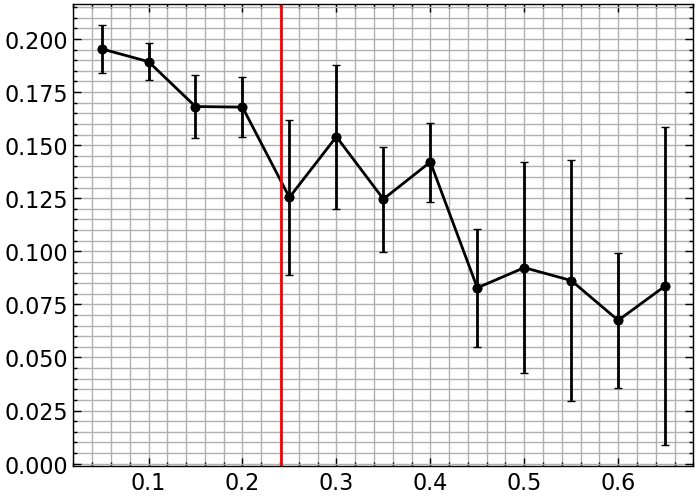

In [235]:
plt.plot(rats, oabunds, 'ko-')
plt.errorbar(rats, oabunds, yerr=doabunds, fmt='ko', capsize=3)
plt.grid(which='both')
plt.axvline(xfit, color='r')

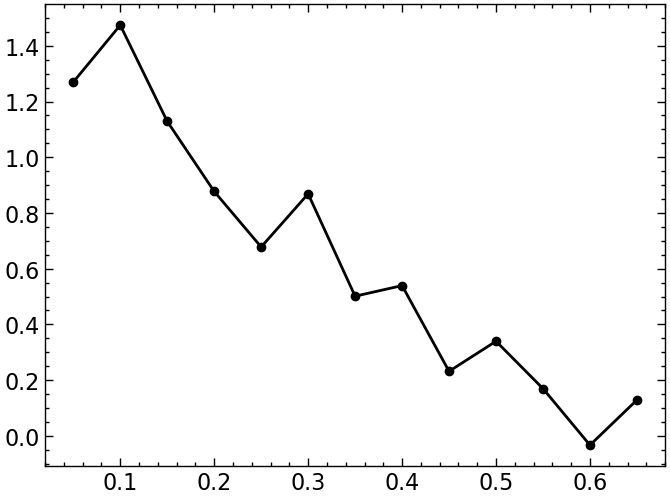

In [236]:
plt.plot(rats, rvs, 'ko-')

0.761 -0.138 0.089


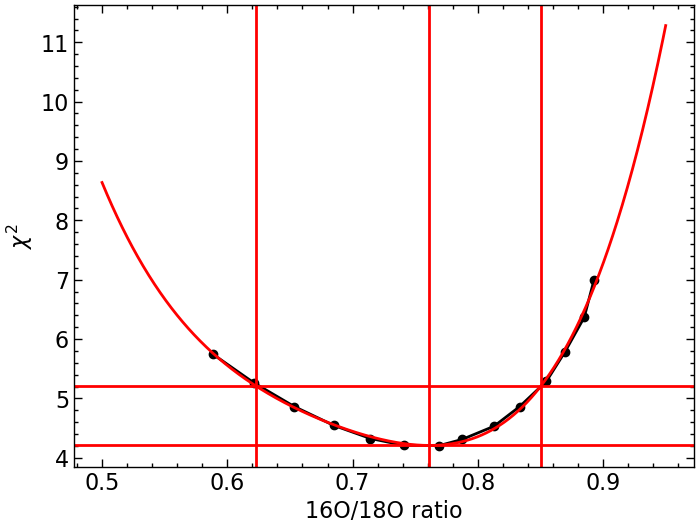

: 

In [94]:
o18rats = 1/(1+rats)
plt.plot(o18rats, chis, 'ko-')
p = np.polyfit(o18rats, chis, 4)

# Evaluate the polynomial fit on a logarithmic scale
x = np.linspace(0.5, 0.95, 1000)
y = np.polyval(p, x)

# Convert x back to the original scale for plotting
# x_original = np.exp(x)

# Plot the polynomial fit
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')

# Find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y - ybound)
idx = np.where(diff == np.min(diff))
# Find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx] - xfit).round(3), (x[idx2] - xfit).round(3)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')

print(xfit[0].round(3), xbounds[0][0], xbounds[1][0])

# Label the axes
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# plt.xscale('log')
# xs = np.linspace(np.log(300), np.log(800), 10)
# plt.plot(np.exp(xs), np.polyval(p, (xs)), 'k.')
plt.show()

In [67]:
# outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/wise222/Oct-13-2024-22-42-15_0.9770073685963133_LTE_O_1D"
outpath = "/media/advait/DATA/research/rcb-project/TSFitPy/output_files/b42/Nov-25-2024-02-52-21_0.9294984445040658_LTE_O_1D"
config_dict = load_output_data(outpath)
output_results_pd_df = config_dict["output_file_df"]
output_trimmed = (output_results_pd_df[output_results_pd_df["chi_squared"] < 20])
output_trimmed = output_trimmed[output_trimmed['O_Fe'] + solar_abundances['O'] > 8.6]

/media/advait/DATA/research/rcb-project/TSFitPy/plotting_tools/scripts_for_plotting.py:109: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  output_file_df = output_file_df.apply(pd.to_numeric, errors='ignore')


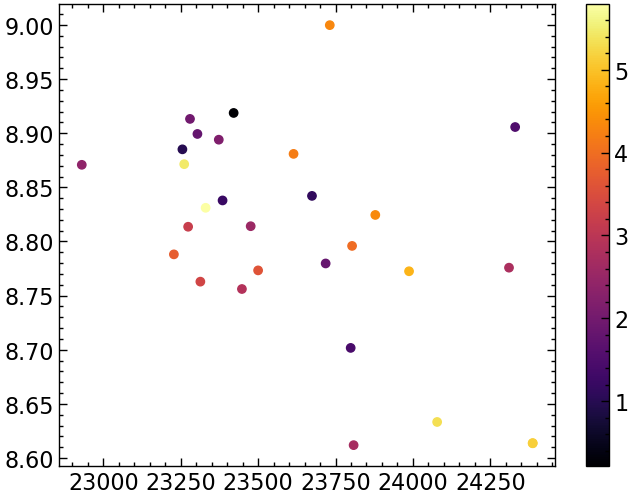

In [68]:
plt.scatter(output_trimmed['wave_center'], output_trimmed['O_Fe']+solar_abundances['O'], c = output_trimmed['chi_squared'], cmap = 'inferno')
plt.colorbar()

In [69]:
(solar_abundances['O']+np.mean(output_trimmed['O_Fe'])).round(3), np.std(output_trimmed['O_Fe']).round(3)

(np.float64(8.806), np.float64(0.097))

In [70]:
np.mean(output_trimmed['O_Fe'])

np.float64(0.03623448275862068)

In [3]:
solar_abundances['F']

4.4